# EDA Dengue

### Imports

In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Información dataset

Datos de entrenamiento, periodo registrado entre el 2013-2018, sobre el dengue en Colombia, variables sobre paciente, tipo de enfermedad y estado final del caso.

In [230]:
# Lectura
data = pd.read_csv(r"C:\Users\danie\Dengue\Dengue_fill\Datos\Dengue_entre.csv",dtype={36: str})

In [231]:
# Correcion de tipo
columnas_fecha = ["FEC_NOT", "FEC_CON", "INI_SIN", "FEC_HOS", "FEC_DEF"]
data[columnas_fecha] = data[columnas_fecha].apply(pd.to_datetime, errors='coerce')


#Seleccion de variables de estudio"
columnas = [ "EDAD_AJUSTADA", "SEXO","TIP_SS", "GP_MIGRANT", "GP_POBICFB", "GP_GESTAN", 
            "AREA","COD_PAIS_O", "COD_DPTO_O","COD_MUN_O", "PAIS_OCU", "DPTO_OCU", "MUN_OCU",  
            "SEMANA", "ANO", "COD_EVE", "EVENTO", "TIP_CAS", "ESTADO_FINAL", "CASO", "PAC_HOS", "CON_FIN", "confirmados",
            "FEC_NOT", "FEC_CON", "INI_SIN", "FEC_HOS", "FEC_DEF"
           ]
df = data[columnas]

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500444 entries, 0 to 500443
Data columns (total 28 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   EDAD_AJUSTADA  500439 non-null  float64       
 1   SEXO           500444 non-null  object        
 2   TIP_SS         500444 non-null  object        
 3   GP_MIGRANT     500444 non-null  int64         
 4   GP_POBICFB     500444 non-null  int64         
 5   GP_GESTAN      500444 non-null  int64         
 6   AREA           500444 non-null  int64         
 7   COD_PAIS_O     500444 non-null  int64         
 8   COD_DPTO_O     500444 non-null  int64         
 9   COD_MUN_O      500444 non-null  int64         
 10  PAIS_OCU       500444 non-null  object        
 11  DPTO_OCU       500444 non-null  object        
 12  MUN_OCU        500444 non-null  object        
 13  SEMANA         500444 non-null  int64         
 14  ANO            500444 non-null  int64         
 15  

### NA

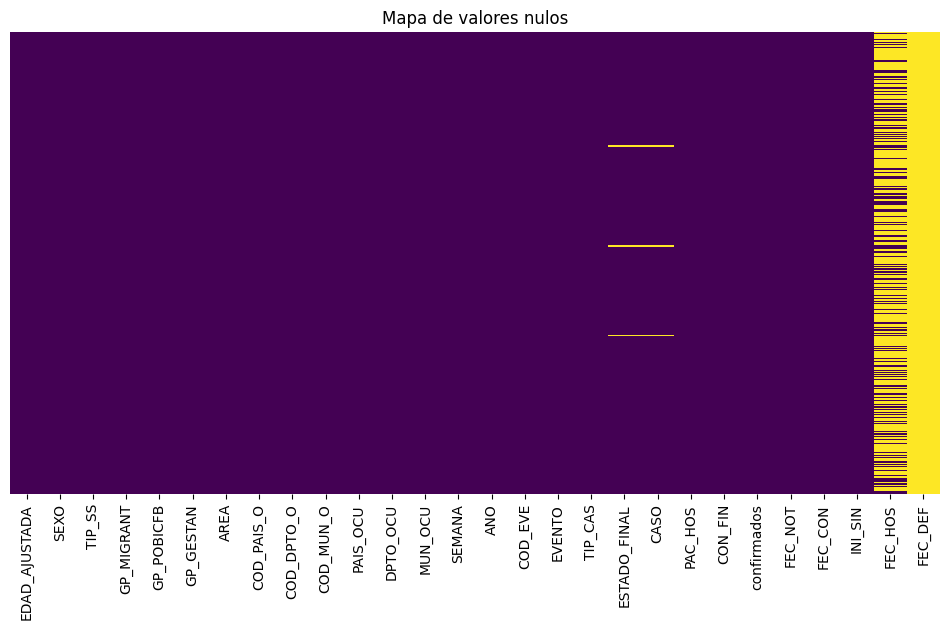

In [233]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Mapa de valores nulos")
plt.show()

In [234]:
# Imputacion de datos faltantes generando valores aleatorios segun la distribucion
# Obtener distribución de ESTADO_FINAL en "DENGUE GRAVE"
probs = df.loc[df["EVENTO"] == "DENGUE GRAVE", "ESTADO_FINAL"].value_counts(normalize=True)

# Generar valores aleatorios según la distribución
missing_count = df.loc[(df["EVENTO"] == "DENGUE GRAVE") & (df["ESTADO_FINAL"].isna())].shape[0]
imputed_values = np.random.choice(probs.index, size=missing_count, p=probs.values)

# Asignar los valores imputados
df.loc[(df["EVENTO"] == "DENGUE GRAVE") & (df["ESTADO_FINAL"].isna()), "ESTADO_FINAL"] = imputed_values


# Llenado de variable
# Crear un diccionario de mapeo
estado_a_caso = {
    2: "Probable",
    3: "Confirmado por laboratorio",
    5: "Confirmado por Nexo Epidemiológico"
}

# Llenar los valores NaN en CASO basándose en ESTADO_FINAL
df.loc[df["CASO"].isna(), "CASO"] = df["ESTADO_FINAL"].map(estado_a_caso)


## Descriptivo de variables

### Edad

In [235]:
#Ajuste de edades menor a un año
df.loc[df["EDAD_AJUSTADA"] < 1, "EDAD_AJUSTADA"] = 0.5 

# Descripcion
df["EDAD_AJUSTADA"].describe()

count    500439.000000
mean         25.327645
std          19.919655
min           0.500000
25%          10.000000
50%          20.000000
75%          37.000000
max         131.000000
Name: EDAD_AJUSTADA, dtype: float64

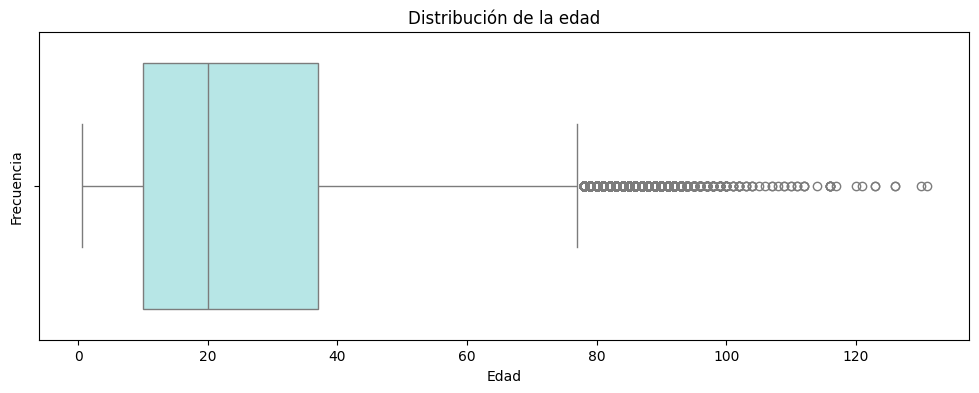

In [236]:
plt.figure(figsize=(12, 4))
sns.boxplot(x = "EDAD_AJUSTADA", data = df, color = "paleturquoise")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.title("Distribución de la edad")
plt.show()

Text(0.5, 0, 'Edad')

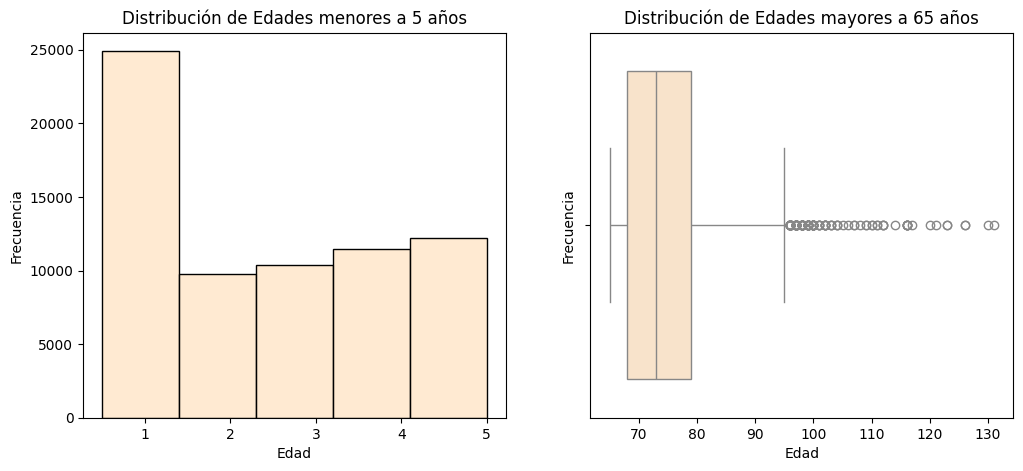

In [237]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

df_menores = df[df["EDAD_AJUSTADA"] <= 5]
sns.histplot(df_menores["EDAD_AJUSTADA"], bins = 5, color = "bisque", ax=axes[0])
axes[0].set_title("Distribución de Edades menores a 5 años")
axes[0].set_ylabel("Frecuencia")
axes[0].set_xlabel("Edad")

df_mayores = df[df["EDAD_AJUSTADA"] >= 65]
sns.boxplot(x = df_mayores["EDAD_AJUSTADA"], color = "bisque", ax=axes[1])
axes[1].set_title("Distribución de Edades mayores a 65 años")
axes[1].set_ylabel("Frecuencia")
axes[1].set_xlabel("Edad")


Edad de los pacientes está entre menos de un año y 131 años, con una media de 25 años, con mayor concentración de casos entre los 10 a 37 años. 

### Sexo

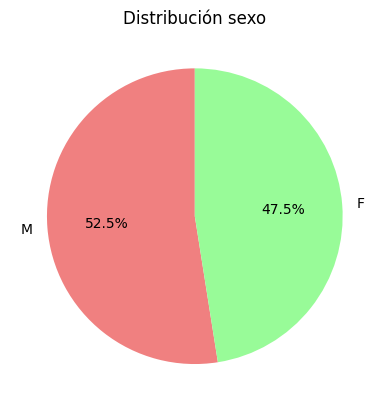

SEXO
M    52.495984
F    47.504016
Name: proportion, dtype: float64

In [238]:
sex_count = df["SEXO"].value_counts()
plt.pie(sex_count, labels = sex_count.index, autopct="%1.1f%%", startangle=90, colors = ["lightcoral", "palegreen"] )
plt.title("Distribución sexo")
#plt.xlabel("Sexo:  Masculino Femenino")
#plt.ylabel("Frecuencia")
plt.show()
df["SEXO"].value_counts()
df["SEXO"].value_counts(normalize=True) * 100


La cantidad de pacientes masculinos y femeninos es, equilibrada, siendo un 52.5% hombres y 47.50% mujeres

### Grupo poblacional

  Grupo de Pertenencia  Cantidad de Personas
0           GP_MIGRANT                  1192
1            GP_GESTAN                  3611
2           GP_POBICFB                   742


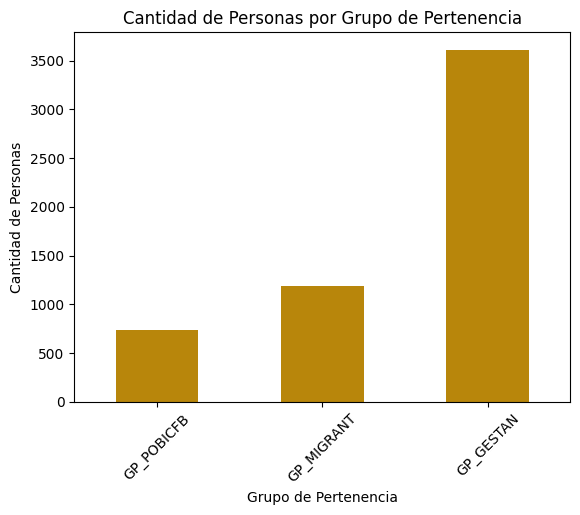

In [239]:
tabla_grupos = pd.DataFrame({"Grupo de Pertenencia": conteo_grupos.index, "Cantidad de Personas": conteo_grupos.values})
print(tabla_grupos)

grupo_cols = ["GP_MIGRANT","GP_GESTAN","GP_POBICFB"]
conteo_grupos = df[grupo_cols].apply(lambda x: (x == 1).sum())
conteo_grupos.sort_values().plot(kind="bar", color="darkgoldenrod")
plt.xlabel("Grupo de Pertenencia")
plt.ylabel("Cantidad de Personas")
plt.title("Cantidad de Personas por Grupo de Pertenencia")
plt.xticks(rotation=45)
plt.show()

### Lugar de ocurrencia

**Departamento**

In [240]:
tabla_dptos = pd.DataFrame({
    "Mayor ocurrencia": df["DPTO_OCU"].value_counts().nlargest(10).index,
    "Casos (mayor)": df["DPTO_OCU"].value_counts().nlargest(10).values,
    "Menor ocurrencia": df["DPTO_OCU"].value_counts().nsmallest(10).index,
    "Casos(menor)": df["DPTO_OCU"].value_counts().nsmallest(10).values,
})
print(tabla_dptos)

  Mayor ocurrencia  Casos (mayor)         Menor ocurrencia  Casos(menor)
0            VALLE          86298  PROCEDENCIA DESCONOCIDA            43
1        ANTIOQUIA          55248                   VAUPES            54
2        SANTANDER          50337                   BOGOTA           317
3           TOLIMA          42990               SAN ANDRES           433
4             META          31442                  GUAINIA           543
5  NORTE SANTANDER          29661                  VICHADA           838
6        ATLANTICO          24657                 EXTERIOR           906
7            HUILA          23393                 AMAZONAS          1155
8     CUNDINAMARCA          18600                    CHOCO          1255
9            CESAR          16456                   NARIÑO          2422


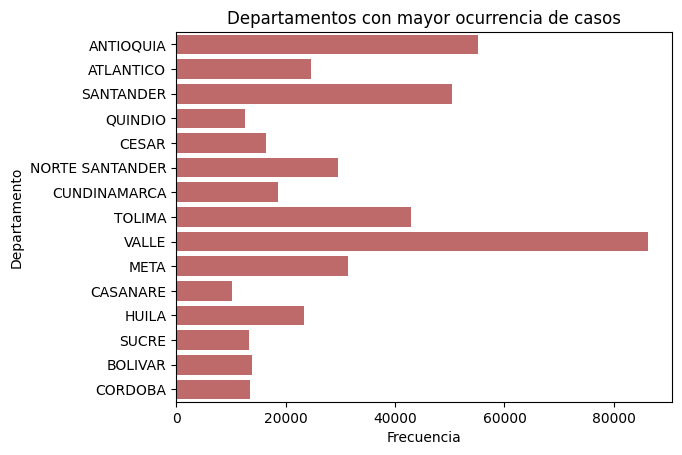

In [241]:
df_filtered = df["DPTO_OCU"].value_counts().loc[lambda x: (x >= 10000) & (x <= 90000)].index

sns.countplot(y="DPTO_OCU", data=df[df["DPTO_OCU"].isin(df_filtered)], color = "indianred")
plt.title("Departamentos con mayor ocurrencia de casos")
plt.xlabel("Frecuencia")
plt.ylabel("Departamento")
plt.show()

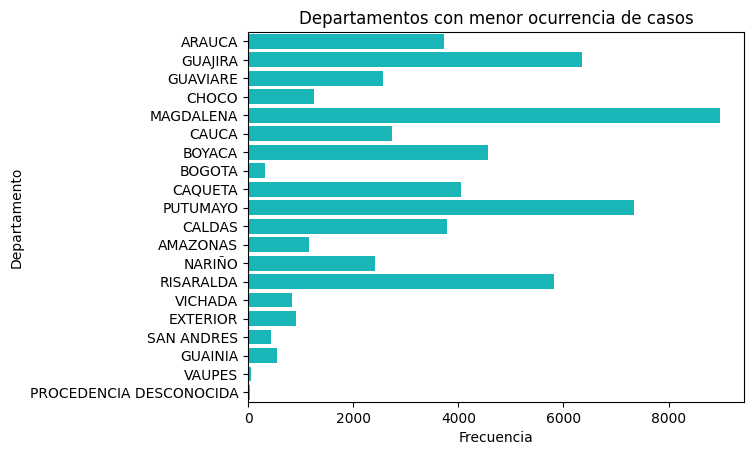

In [242]:
df_filtered = df["DPTO_OCU"].value_counts().loc[lambda x: (x >= 0) & (x <= 10000)].index

sns.countplot(y="DPTO_OCU", data=df[df["DPTO_OCU"].isin(df_filtered)], color = "darkturquoise")
plt.title("Departamentos con menor ocurrencia de casos")
plt.xlabel("Frecuencia")
plt.ylabel("Departamento")
plt.show()

Los departamentos con menor cantidad de casos reportados son Vaupes, San Andres, Guainia, Vichada, con menor cantidad de casos reportados, menos de 1000.
Se deben tener en cuenta los casos de procedencia desconocida y exterior.

Los departamentos con mayor ocurrencia son Valle del Cauca, Antioquia, Santander y Tolima con mas de 40000 casos registrados por año.

**Municipios**

In [243]:
tabla_mun = pd.DataFrame({
    "Mayor ocurrencia": df["MUN_OCU"].value_counts().nlargest(15).index,
    "Casos": df["MUN_OCU"].value_counts().nlargest(15).values,
})
print(tabla_mun)

   Mayor ocurrencia  Casos
0              CALI  62954
1          MEDELLIN  29978
2            IBAGUE  17503
3            CUCUTA  16361
4     VILLAVICENCIO  15634
5       BUCARAMANGA  15602
6      BARRANQUILLA  11274
7             NEIVA  10405
8     FLORIDABLANCA   9245
9         SINCELEJO   7839
10          ARMENIA   6254
11       VALLEDUPAR   6027
12         MONTERIA   5113
13            GIRON   4648
14            YOPAL   4444


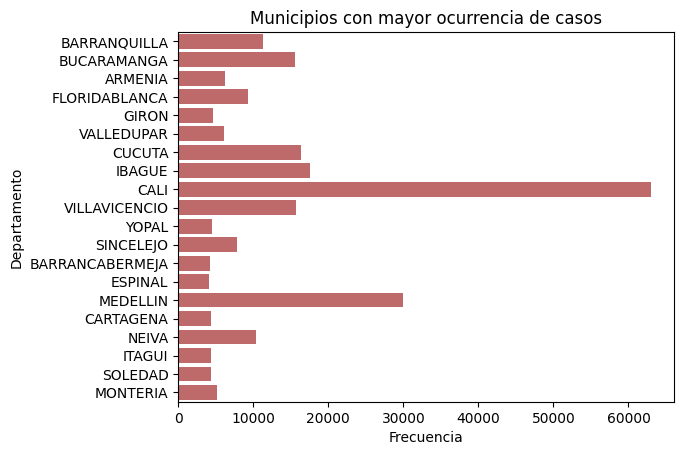

In [244]:
df_filtered = df["MUN_OCU"].value_counts().loc[lambda x: (x >= 4000) & (x <= 65000)].index

sns.countplot(y="MUN_OCU", data=df[df["MUN_OCU"].isin(df_filtered)], color = "indianred")
plt.title("Municipios con mayor ocurrencia de casos")
plt.xlabel("Frecuencia")
plt.ylabel("Departamento")
plt.show()

### Semana

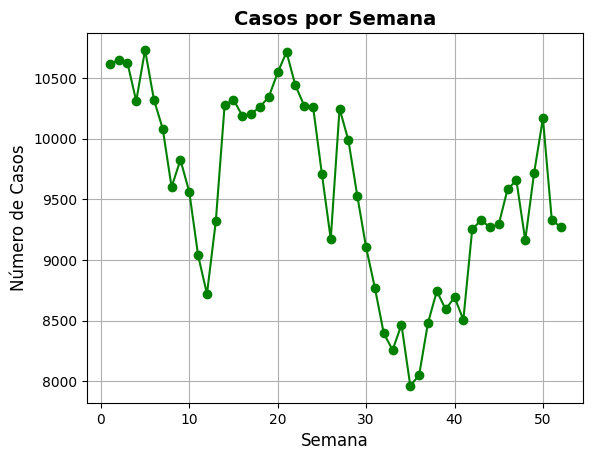

In [245]:
semana_excluir = 53 
conteo_semanal = df[df["SEMANA"] != semana_excluir]["SEMANA"].value_counts().sort_index()

plt.plot(conteo_semanal.index, conteo_semanal.values, marker="o", linestyle="-", color="g")
plt.title("Casos por Semana", fontsize=14, fontweight="bold")
plt.xlabel("Semana", fontsize=12)
plt.ylabel("Número de Casos", fontsize=12)
plt.grid(True)

Advertencia: Exclusion del gráfico de la semana 53

In [246]:
tabla_semana = pd.DataFrame({
    "Mayor ocurrencia": df["SEMANA"].value_counts().nlargest(10).index,
    "Casos (mayor)": df["SEMANA"].value_counts().nlargest(10).values,
    "Menor ocurrencia": df["SEMANA"].value_counts().nsmallest(10).index,
    "Casos(menor)": df["SEMANA"].value_counts().nsmallest(10).values,
})
print(tabla_semana)

   Mayor ocurrencia  Casos (mayor)  Menor ocurrencia  Casos(menor)
0                 5          10732                53          2489
1                21          10714                35          7962
2                 2          10647                36          8052
3                 3          10628                33          8258
4                 1          10620                32          8395
5                20          10546                34          8467
6                22          10440                37          8482
7                19          10345                41          8508
8                 6          10323                39          8593
9                15          10322                40          8693


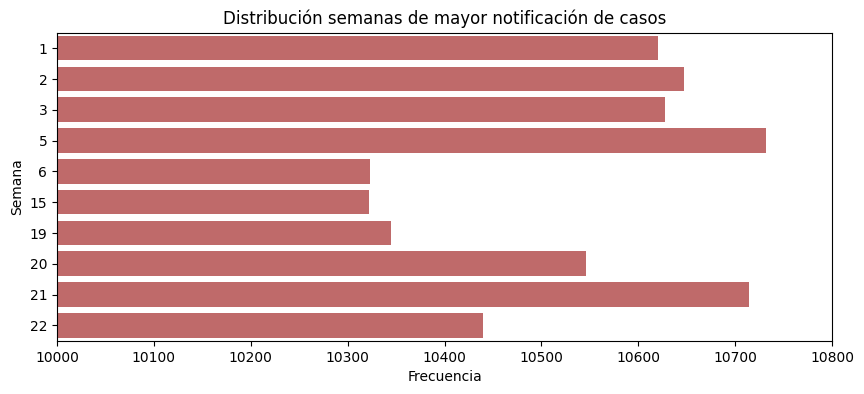

In [247]:
df_filtered = df["SEMANA"].value_counts().nlargest(10).index

plt.figure(figsize=(10, 4)) 
sns.countplot(y="SEMANA", data=df[df["SEMANA"].isin(df_filtered)], color = "indianred")
plt.xlim(10000, 10800) 
plt.title("Distribución semanas de mayor notificación de casos")
plt.xlabel("Frecuencia")
plt.ylabel("Semana")
plt.show()

De la semana 1-7, 14-24, semana 27 y 50, se encuentran los picos mas altos de reporte de casos, en general, con más de 10000 reportes.

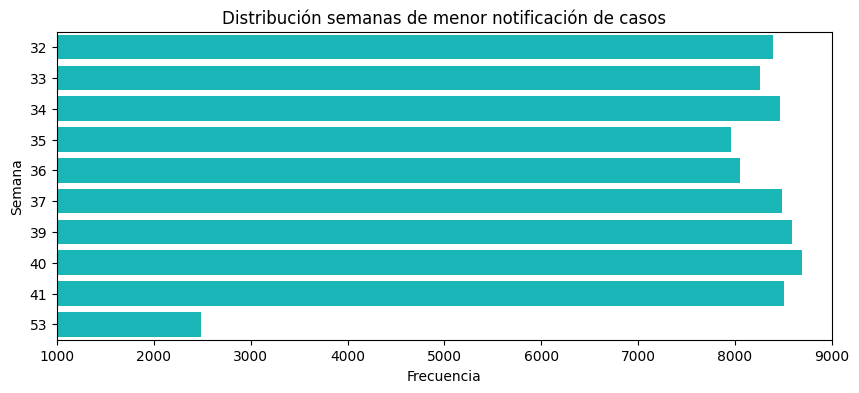

In [248]:
df_filtered = df["SEMANA"].value_counts().nsmallest(10).index

plt.figure(figsize=(10, 4)) 
sns.countplot(y="SEMANA", data=df[df["SEMANA"].isin(df_filtered)], color = "darkturquoise")
plt.xlim(1000, 9000) 
plt.title("Distribución semanas de menor notificación de casos")
plt.xlabel("Frecuencia")
plt.ylabel("Semana")
plt.show()

### Estado del caso

Estado inicial y final del caso

In [249]:
tabla_caso = pd.DataFrame({
    "Nombre del Caso": df["CASO"].value_counts().index,
    
    "Caso inicial": df["TIP_CAS"].value_counts().index,
    "Caso _TC": df["TIP_CAS"].value_counts().values,
    
    "Estado final": df["ESTADO_FINAL"].value_counts().index,
    "Casos_EF": df["ESTADO_FINAL"].value_counts().values,
})
print(tabla_caso)

                      Nombre del Caso  Caso inicial  Caso _TC  Estado final  \
0                            Probable             2    386002           2.0   
1          Confirmado por laboratorio             3    108799           3.0   
2  Confirmado por Nexo Epidemiológico             5      5643           5.0   

   Casos_EF  
0    263201  
1    211054  
2     26189  


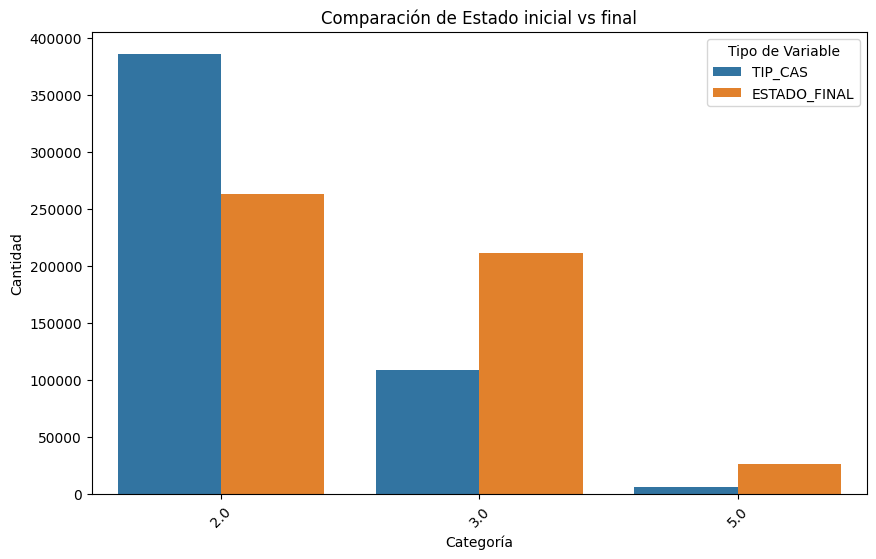

In [250]:
df_melted = df.melt(value_vars=["TIP_CAS", "ESTADO_FINAL"], var_name="Variable", value_name="Valor")
# Crear el countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df_melted, x="Valor", hue="Variable")


# Personalizar el gráfico
plt.title("Comparación de Estado inicial vs final")
plt.xlabel("Categoría")
plt.ylabel("Cantidad")
plt.legend(title="Tipo de Variable")
plt.xticks(rotation=45)
plt.show()

Inicialmente los casos en su mayoria fueron catalogados como probables, mientras que el estado final, aumento la cantidad de pacientes confirmados por laboratorio.

### Hospitalización

In [251]:
tabla_hosp = pd.DataFrame({
    "Hospitalizacion": df["PAC_HOS"].value_counts().index,
    "Pacientes": df["PAC_HOS"].value_counts().values,
})
print(tabla_hosp)

   Hospitalizacion  Pacientes
0                2     315801
1                1     184643


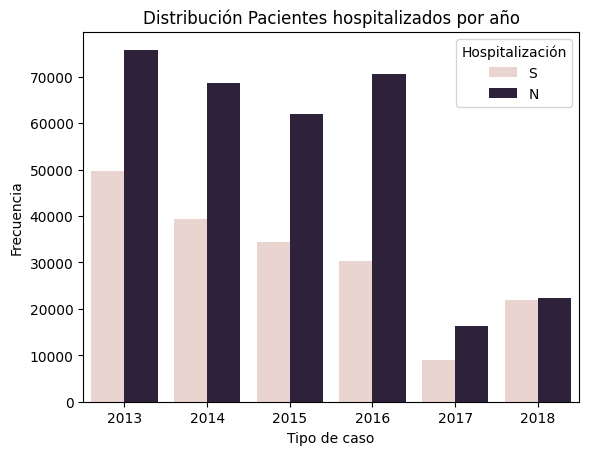

In [252]:
sns.countplot(x="ANO", data=df, hue = "PAC_HOS", legend = True)
#plt.xlim(10000, 11000) 
plt.title("Distribución Pacientes hospitalizados por año")
plt.ylabel("Frecuencia")
plt.xlabel("Tipo de caso")
plt.legend(title = "Hospitalización", labels = "SN")
plt.show()

In [253]:
tabla = df.groupby("EVENTO")["PAC_HOS"].value_counts().unstack().fillna(0)

# Renombrar columnas para mayor claridad
tabla.columns = ["No Hospitalizado (0)", "Hospitalizado (1)"]
print(tabla)

              No Hospitalizado (0)  Hospitalizado (1)
EVENTO                                               
DENGUE                      176983             314654
DENGUE GRAVE                  7660               1147


## Comparativo

### Dias entre el inicio de los sintomas y fecha de consulta

In [259]:
df.loc[:,"INI_SIN"] = pd.to_datetime(df["INI_SIN"], errors="coerce")
df.loc[:,"FEC_CON"] = pd.to_datetime(df["FEC_CON"], errors="coerce")

#Diferencia de dias
df["DIF_DIAS"] = (df["FEC_CON"] - df["INI_SIN"]).dt.days
conteo_dias = df["DIF_DIAS"].value_counts().sort_index()

df = df.copy()
#Tabla agrupada
bins = [-1, 0, 3, 7, 14, 30, 60, 120, df["DIF_DIAS"].max()]
labels = ["0 días", "1-3 días", "4-7 días", "8-14 días", "15-30 días", "31-60 días", "61-120 días", "Más de 120 días"]
df["GRUPO_DIAS"] = pd.cut(df["DIF_DIAS"], bins=bins, labels=labels)

tabla_frecuencia = df["GRUPO_DIAS"].value_counts().reset_index()
tabla_frecuencia.columns = ["Intervalo de Días", "Frecuencia"]
tabla_frecuencia = tabla_frecuencia.sort_values(by="Intervalo de Días")
tabla_frecuencia["Frecuencia Relativa (%)"] = (tabla_frecuencia["Frecuencia"] / tabla_frecuencia["Frecuencia"].sum()) * 100
print(tabla_frecuencia)


  Intervalo de Días  Frecuencia  Frecuencia Relativa (%)
2            0 días       48799                 9.753285
0          1-3 días      235107                46.990011
1          4-7 días      191222                38.218870
3         8-14 días       19492                 3.895798
4        15-30 días        3468                 0.693137
5        31-60 días        1245                 0.248834
6       61-120 días         549                 0.109727
7   Más de 120 días         452                 0.090340


## a